

# Project: Investigate a Dataset (TMDB movie data)
<a id='home11'></a>
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitation">Limitation</a></li>
<li><a href="#conclusions">Conclusions</a></li>

</ul>

<a id='intro'></a>
## Introduction

In this Project i choose to investigate the TMDB movie data set which contains information about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings, revenue, cast members, runtime, release year,... etc.

**Questions about this data set :**

<ul>   
<li>which movie has the most and least profit ?</li>
<li>which movie has the most and least budgets ?</li>
<li>which movie has the most and least revenue ?</li>
<li>what is the average runtime of the movies ?</li>
<li>who are the top 3 directors with the most released movies ?</li>

<li>Which genre were more successful?</li>

<li>List the actors that are most frequent among others</li>
<li>What kind of properties are associated with movies with high profit?</li>
</ul>

<a href="#home11">back to Table of Contents</a>


In [26]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb = pd.read_csv('tmdb-movies.csv')
tmdb.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**I noticed the following :**

<ul>   
<li>The unit of currency is not mentioned in this data set so we will assume it is US dollar.</li>

<li>The popularity is not correct because the voters count diverse for each movie so it's not valid to be used in analysing.</li>
</ul>

### Data Cleaning (Replace this with more specific notes!)

**i will do the following :**

<ul>   
<li>Removing columns such as: id, imdb_id, vote_count, production_company, keywords, homepage.</li>
<li>Removing the duplicacy.</li>
<li>Discarding records that have zero budget or zero revenue.</li>
<li>Converting release date column into date format.</li>
<li>Replacing zero with NAN in runtime column.</li>
<li>Changing format of budget and revenue column.</li>
</ul>

<a href="#home11">back to Table of Contents</a>


In [3]:
#Removing columns such as: id, imdb_id, vote_count, production_company, keywords, homepage
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'vote_count', 'vote_average']
tmdb= tmdb.drop(del_col,1)
tmdb.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


In [6]:
# counting rowa and columns 
rows, col = tmdb.shape
print('There number of movies is {} movie and the no.of columns is {} column '.format(rows-1, col))

There number of movies is 10864 movie and the no.of columns is 11 column 


In [7]:
#Removing the duplicacy.
tmdb.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb.shape

# counting rowa and columns again 
print('There number of movies is {} movie and the no.of columns is {} column '.format(rows-1, col))

There number of movies is 10864 movie and the no.of columns is 11 column 


In [8]:
#Discarding records that have zero budget or zero revenue.
list11=['budget', 'revenue']
tmdb[list11]=tmdb[list11].replace(0,np.NAN)
tmdb.dropna(subset = list11, inplace = True)

rows, col = tmdb.shape
print('I discarded the The records with zero budget or zero revenue, \nso now the number of movies is {} movie and the no.of columns is {} column '.format(rows-1, col))

I discarded the The records with zero budget or zero revenue, 
so now the number of movies is 3853 movie and the no.of columns is 11 column 


In [9]:
#Converting release date column into date format.
tmdb.release_date = pd.to_datetime(tmdb['release_date'])

#to check the affected recoreds
tmdb.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


In [10]:
#Replacing zero with NAN in runtime column.
tmdb['runtime'] =tmdb['runtime'].replace(0, np.NAN)

#checking the current datatypes
tmdb.dtypes

budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

In [11]:
#Changing format of budget and revenue column.
change_type=['budget','revenue']
tmdb[change_type]=tmdb[change_type].applymap(np.int64)

#checking the current datatypes
tmdb.dtypes

budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

<a href="#home11">back to Table of Contents</a>

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 
**which movies has the most and least profit ?**


in order to know this i will calculate the profit for each movie then assign it to new column in the dataset.

In [12]:
#calculate the profit and assign it to new column
tmdb.insert(2,'profit',tmdb['revenue']-tmdb['budget'])

tmdb.head(2)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015


in order to know the min & max of any column i will create new function.

In [13]:
def simple_analysis(column):

    highest= tmdb[column].idxmax()
    high11=pd.DataFrame(tmdb.loc[highest])

    lowest= tmdb[column].idxmin()
    low11=pd.DataFrame(tmdb.loc[lowest])

    result=pd.concat([high11, low11], axis=1)
    
    return result

simple_analysis('profit')


,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


### Answear Question 1 
which movie has the most and least profit ?

**The result shows that "Avatar" movie has the highest profit and "The Warrior's Way" has the lowest.**

<a href="#home11">back to Table of Contents</a>

### Research Question 2 
**which movie has the most and least budgets ?**


in order to know this i will use the same function, simple_analysis.

In [14]:
simple_analysis('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


### Answear Question 2 
which movie has the most and least budgets ?

**The result shows that "The Warrior's Way" movie has the highest budget and "Lost & Found" has the lowest.**

<a href="#home11">back to Table of Contents</a>

### Research Question 3
**which movie has the most and least revenue ?**


in order to know this i will use the same function, simple_analysis.

In [15]:
simple_analysis('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...


### Answear Question 3
which movie has the most and least revenue ?

**The result shows that "Avatar" movie has the highest revenue and "Shattered Glass" has the lowest.**

<a href="#home11">back to Table of Contents</a>

### Research Question 4 

**what is the average runtime of the movies ?**

in order to know this i will create function to calculate the average of all the values in the given column.

In [16]:
def average(column):
    return tmdb[column].mean()

now i will run the function with the "Runtime coulmn"

### Answear Question 4
what is the average runtime of the movies ?

In [17]:
avg11=average('runtime')
print('The average runtime of all the movies is {} minutes '.format(round(avg11, 5)))

The average runtime of all the movies is 109.22029 minutes 


**Representing the average data in a histogram**

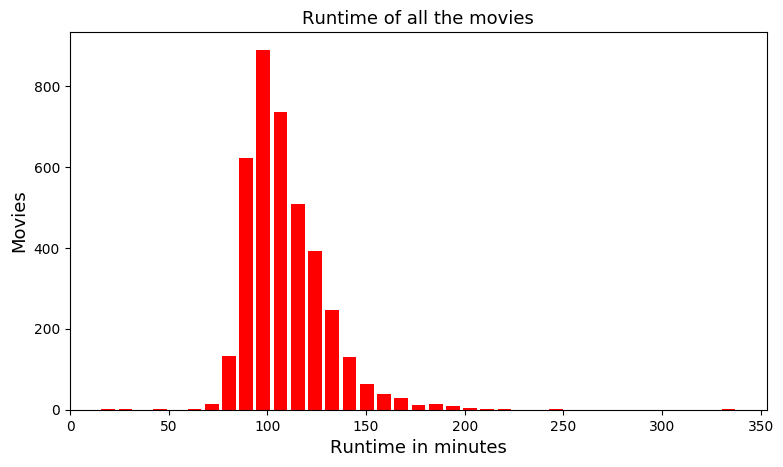

In [18]:
plt.figure(figsize=(9,5), dpi = 100)

plt.xlabel('Runtime in minutes', fontsize = 13)
plt.ylabel('Movies', fontsize=13)
plt.title('Runtime of all the movies', fontsize=13)
plt.hist(tmdb['runtime'], rwidth = 0.8, bins =37, color='red')

plt.show()

<a href="#home11">back to Table of Contents</a>

### Research Question 5 

**who are the top 3 directors with the most released movies ?**

in order to know this i must create a function to separate the content because some columns contains more that one value separated by '|' 

In [19]:
def separated_by(column_name):
    a = tmdb[column_name].str.cat(sep = '|')
    a = pd.Series(a.split('|'))
    #desc
    count = a.value_counts(ascending = False)
    
    return count

now i will use this (separated_by) function.

### Answear Question 5
who are the top 3 directors with the most released movies ?

In [23]:
directors = separated_by('director')

directors.head(3)

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
dtype: int64

<a href="#home11">back to Table of Contents</a>

### Research Question 6

**Which genre were more successful?**

in order to know this i will call my function separated_by

In [36]:
genres = separated_by('genres')

### Answear Question 6
Which genre were more successful?

In [86]:
genres.head(4)

Drama       1756
Comedy      1358
Thriller    1204
Action      1085
dtype: int64

**Representing the genres data in a graph**

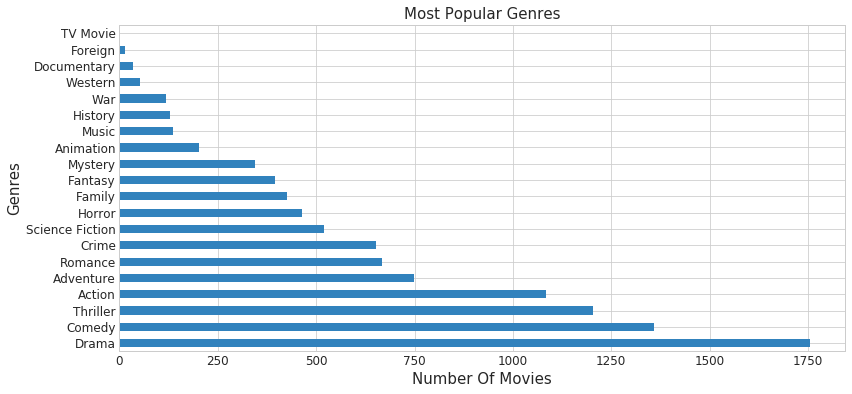

In [87]:
genres.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

plt.title("Most Popular Genres",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=15)
plt.ylabel("Genres",fontsize= 15)
sns.set_style("whitegrid")

<a href="#home11">back to Table of Contents</a>

### Research Question 7

**List the actors that are most frequent among others**

in order to know this i will call my function separated_by

In [39]:
actors = separated_by('cast')

### Answear Question 7
List the actors that are most frequent among others

In [42]:
actors.head(12)

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Morgan Freeman        34
Brad Pitt             34
Sylvester Stallone    34
Tom Hanks             34
Harrison Ford         34
Tom Cruise            33
dtype: int64

**Representing the actors data in a graph**

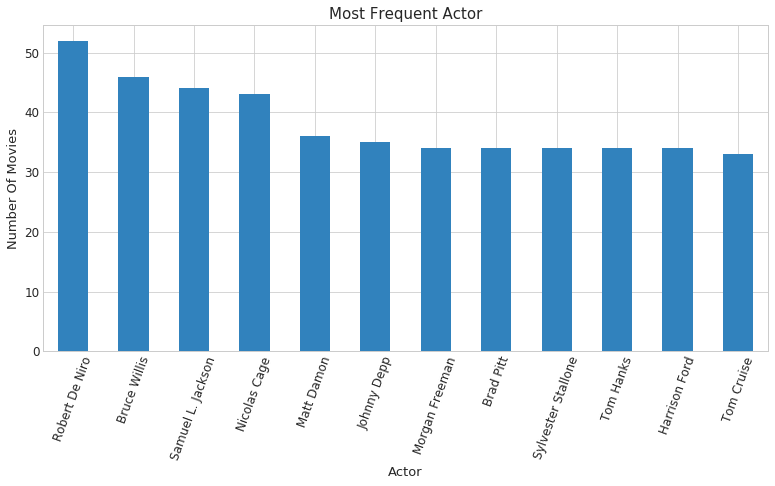

In [60]:
actors.iloc[:12].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

<a href="#home11">back to Table of Contents</a>

### Research Question 8

**What kind of properties are associated with movies with high profit?**

In order to analyze this i will compare and try to figure the relation between the Profit and (runtime ,Budget)

In [85]:

relation1 = pd.DataFrame(tmdb['profit'].sort_values(ascending=False))
data_set1 = ['budget','runtime']
for i in data_set1:
    relation1[i] = tmdb[i]
relation1.head(10)

,profit,budget,runtime
1386,2544505847,237000000,162
3,1868178225,200000000,136
5231,1645034188,200000000,194
0,1363528810,150000000,124
4,1316249360,190000000,137
4361,1299557910,220000000,143
3374,1202817822,125000000,130
14,1125035767,280000000,141
5422,1124219009,150000000,102
8094,1084279658,22000000,114


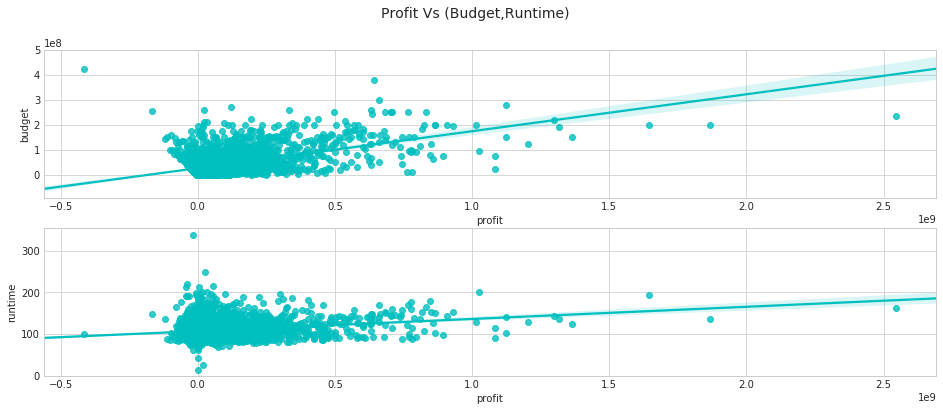

In [83]:
fig, axes = plt.subplots(2,figsize = (16,6))
fig.suptitle("Profit Vs (Budget,Runtime)",fontsize=14)


sns.regplot(x=tmdb['profit'], y=tmdb['budget'],color='c',ax=axes[0])
sns.regplot(x=tmdb['profit'], y=tmdb['runtime'],color='c',ax=axes[1])


sns.set_style("whitegrid")

### Answear Question 8
What kind of properties are associated with movies with high profit?

**Profit & Budget :**
It turn out that the more you spend in the movie the chance of the profit to be increased is getting more too.
From the graph and the line i can tell that the percentage of this to happen can be between 50% and 70%.

**Profit & Runtime :**
I can not tell that there is a real relation here, i can not guarantee at all, so runtime of the movie will not affect the profit.

it might happen but it suly will be caused by other factors as the main causes of it.

**I can tell that the affect of the Budget is greater than the effect of the Runtime.**

<a href="#home11">back to Table of Contents</a>

<a id='limitation'></a>
## Limitations or Challenges

**1-The data contained some extra column that are not sutable for the analysis purpose such as : id, imdb_id, keywords, homepage.**

**2-Some columns has a null ( NAN ) values.** 

in this case you either delete it or replace it with a value, for example : the mean of the entire column can be great choice.

**2-Some columns has wrong data type :so i had to convert release date column into date format** 

**3-Some records had zero budget or zero revenue, this is clearly unuseful data so i removed it, it was around 7011 records, its almost 70% of the recored so the dataset became small after this removing, thats why i can say the dataset had a real lack of accuracy when it comes to the budget and revenue columns.**

**4-The columns of the dataset perresents money but without mentioning the currency, i assumed it and used US dollar but if we want to do the analysis process compared to another makert rather that US the currency is a must.**



<a href="#home11">back to Table of Contents</a>

<a id='conclusions'></a>
## Conclusions

**The data was huge and very useful, it can be a great material to analyse more deep in order to get the effect of a specific factor, for example :**

What factors can lead the movie to be more popular or to have a high vote rating.

**I consider my work as the minimum effort on such dataset.**

**Conclusions:**

**1- The average runtime of all the movies is 109.22029 minutes**

**2- top 3 directors with the most released movies are :**

    Steven Spielberg    28 movies
    Clint Eastwood      24 movies
    Ridley Scott        21 movies
    
**3- Drama is the mots popular Genres, it is the first with 1756 movies,it is surly the producer's faviorate Genre among other Genres, followed by :** 

    Comedy with      1358 movies
    Thriller with    1204 movies
    Action with      1085 movies
    
**4- Robert De Niro frequently appears more than oter actors with 52 movies, followed by :**

    Bruce Willis          46 movies
    Samuel L. Jackson     44 movies
    Nicolas Cage          43 movies

**5- There is a relation between the Profit & the Budget althought its not strong one but the more you spend in the movie the chance of the profit to be increased is getting more too.**

**6- There was not a clear affect of the Runtime on the Profit of the movie.**


 

 

 
 
**Refrences :**

https://matplotlib.org/users/pyplot_tutorial.html

https://matplotlib.org/tutorials/colors/colormaps.html

http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

https://docs.scipy.org/doc/numpy/user/quickstart.html

https://carlyhochreiter.files.wordpress.com/2018/05/investigating-movie-dataset.pdf

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

https://seaborn.pydata.org/tutorial/aesthetics.html?highlight=set_style

https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot

http://pandas.pydata.org/pandas-docs/stable/indexing.html

https://matplotlib.org/users/pyplot_tutorial.html

Python Data Science Handbook by Jake VanderPlas : Chapter 4. Visualization with Matplotlib

<a href="#home11">back to Table of Contents</a>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])